In [62]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# Preprocessing

In [63]:
# read the data
train=pd.read_csv("Train_UWu5bXk.csv")

In [64]:
# first five rows of the dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [65]:
# checking number of missing values in each variable
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [66]:
# imputing missing values in Item_Weight with the median and in Outlet_Size with the mode of corresponding variables
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [67]:
# rechecking the number of missing values
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [68]:
# dropping the ID variables
train=train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [69]:
# converting categorical variables to numerical values
train=pd.get_dummies(train)

In [70]:
# separating the target variable
df = train.drop('Item_Outlet_Sales',1)
target = train['Item_Outlet_Sales']

In [71]:
# Standardising the features
scaler = StandardScaler()
df = scaler.fit_transform(df)

C:\Users\Ekansh\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ekansh\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [72]:
# check shape of dataframe
df.shape

(8523, 35)

In [74]:
# creating the training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(df, target, random_state = 10, test_size = 0.25)

In [75]:
# creating the random forest regressor model
model = RandomForestRegressor(random_state=1, max_depth=3, n_estimators=100)

# Without PCA

In [76]:
# fitting the model on original dataset
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [77]:
# predicting for the original validation set
pred_1 = model.predict(X_valid)

In [78]:
# checking the training performance (root mean squared error)
print(np.sqrt(mean_squared_error(model.predict(X_train), y_train)))

1144.2187244132533


In [79]:
# checking the validation performance (root mean squared error)
print(np.sqrt(mean_squared_error(pred_1, y_valid)))

1178.02849761678


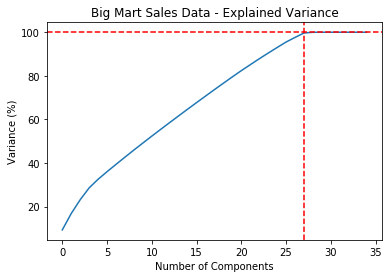

In [86]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)


#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Big Mart Sales Data - Explained Variance')

# Plot a horizontal line at 95% variance
plt.axhline(y=100, color='r', linestyle='--')
plt.axvline(x=27, color='r', linestyle = '--')
plt.show()

In [81]:
# transforming the original train and validation set
pca = PCA(27).fit(X_train)
X_train_transformed = pca.transform(X_train)
X_valid_transformed = pca.transform(X_valid)

In [82]:
# checking shape of data after PCA
X_train_transformed.shape

(6392, 27)

In [83]:
# fitting the same random forest model on transformed data
model.fit(X_train_transformed,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [59]:
# predicting for the transformed validation set
pred_2 = model.predict(X_valid_transformed)

In [84]:
# checking the training performance on transformed data (root mean squared error)
print(np.sqrt(mean_squared_error(model.predict(X_train_transformed), y_train)))

1295.5337126306922


In [85]:
# checking the validation performance on transformed data (root mean squared error)
print(np.sqrt(mean_squared_error(pred_2, y_valid)))

1992.6493166165662
